# Image Refinement

# Morphological Operations
The examples of Erosion, Opening, Closing and Morphological Gradient will take place on text as it is easier to show the effect.

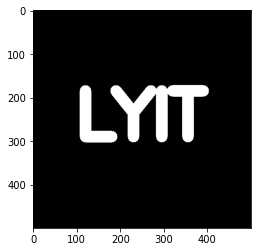

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lyittext =np.zeros((500,500))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(lyittext,text='LYIT',org=(100,290), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
plt.imshow(lyittext,cmap='gray')

**Erosion**

Erodes away boundaries of foreground objects. Works best when foreground is light colour (preferably white) and background is dark.

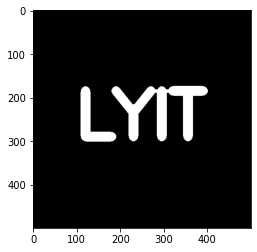

In [2]:
kernel = np.ones((5,5),np.uint8)
erosionimg = cv2.erode(lyittext,kernel,iterations = 1)

plt.imshow(erosionimg,cmap='gray')

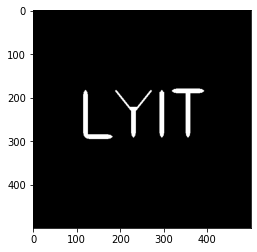

In [3]:
kernel = np.ones((5,5),np.uint8)
moreerosion = cv2.erode(lyittext,kernel,iterations = 4) #The more iterations you have, the more erosion of the image.

plt.imshow(moreerosion,cmap='gray')

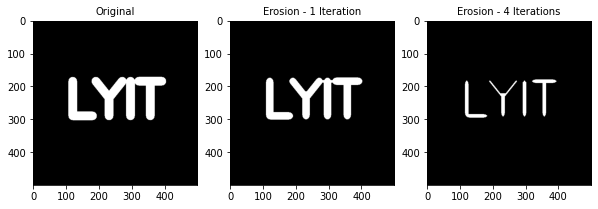

In [4]:
fig = plt.figure(figsize=(10,17))
ax1 = fig.add_subplot(1,3,1)
plt.title('Original', fontsize=10)
ax1.imshow(lyittext,cmap='gray')
ax2 = fig.add_subplot(1,3,2)
plt.title('Erosion - 1 Iteration', fontsize=10)
ax2.imshow(erosionimg,cmap='gray')
ax3 = fig.add_subplot(1,3,3)
plt.title('Erosion - 4 Iterations', fontsize=10)
ax3.imshow(moreerosion,cmap='gray')

**Opening**

Opening is erosion followed by dilation. Useful in removing background noise! This works really well on grayscale images.

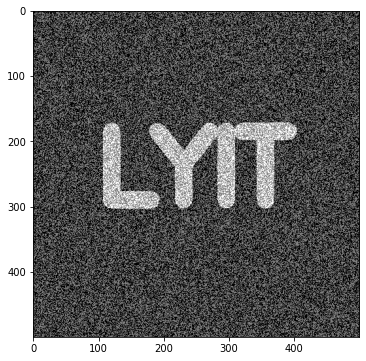

In [5]:
white_noise = np.random.randint(low=0,high=2,size=(500,500))
white_noise = white_noise*255
noisyimg = white_noise+lyittext

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.imshow(noisyimg,cmap='gray')

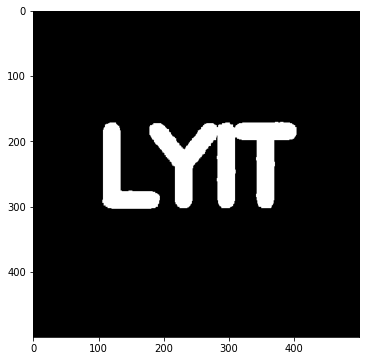

In [6]:
opening = cv2.morphologyEx(noisyimg, cv2.MORPH_OPEN, kernel)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.imshow(opening,cmap='gray')

**Closing**

Useful in removing noise from foreground objects, such as black dots on top of the white text!

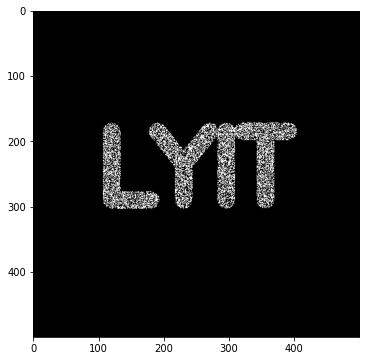

In [7]:
black_noise = np.random.randint(low=0,high=2,size=(500,500))
black_noise = black_noise*-255
bknoisyimg = black_noise+lyittext
bknoisyimg[bknoisyimg==-255] = 0

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.imshow(bknoisyimg,cmap='gray')

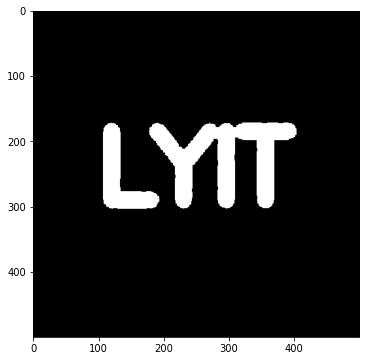

In [8]:
closing = cv2.morphologyEx(bknoisyimg, cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.imshow(closing,cmap='gray')

**Morphological Gradient**

Difference between dilation and erosion of an image.

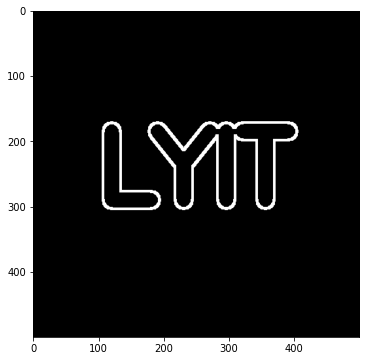

In [9]:
gradient = cv2.morphologyEx(lyittext,cv2.MORPH_GRADIENT,kernel)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.imshow(gradient,cmap='gray')

**Results of Morphological Operations**

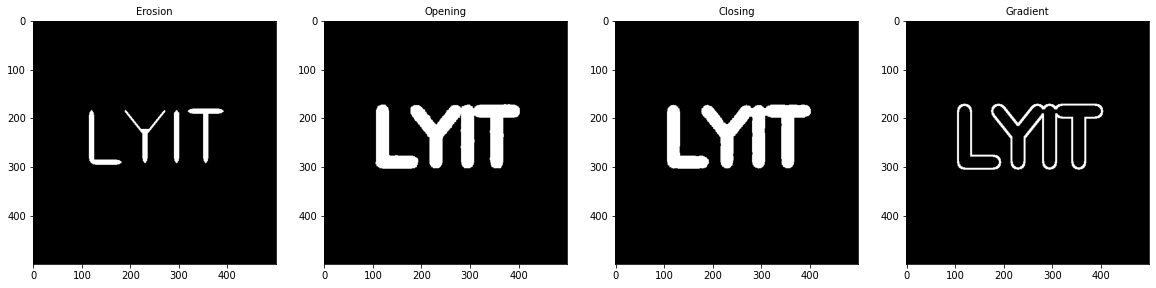

In [10]:
fig = plt.figure(figsize=(20,35))
ax1 = fig.add_subplot(1,4,1)
plt.title('Erosion', fontsize=10)
ax1.imshow(moreerosion,cmap='gray')
ax2 = fig.add_subplot(1,4,2)
plt.title('Opening', fontsize=10)
ax2.imshow(opening,cmap='gray')
ax3 = fig.add_subplot(1,4,3)
plt.title('Closing', fontsize=10)
ax3.imshow(closing,cmap='gray')
ax4 = fig.add_subplot(1,4,4)
plt.title('Gradient', fontsize=10)
ax4.imshow(gradient,cmap='gray')

# Gradient Operations

Mounted at /content/gdrive


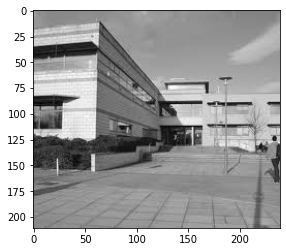

In [11]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
drive.mount('/content/gdrive', force_remount=True)

# Load Image
img1 = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/lyitfront.jpg', 0)
plt.imshow(img1,cmap='gray')

**Sobel-Feldman Operator**

The result of the Sobel–Feldman operator is a 2-dimensional map of the gradient at each point. It can be processed and viewed as though it is itself an image, with the areas of high gradient (the likely edges) visible as white lines. The sobelx will show more vertical features and sobely will show more horizontal features. Laplacian is a differential operator given by the divergence of the gradient of a function on Euclidean space.

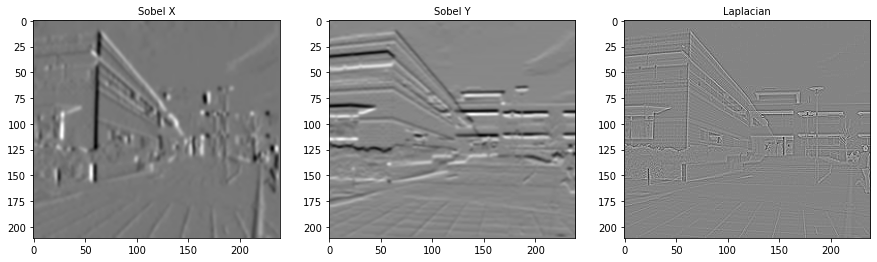

In [12]:
sobelx = cv2.Sobel(img1,cv2.CV_32F,1,0,ksize=11) #CV_32F can be changed to be CV_8, CV_16, CV_32 and CV_64.
sobely = cv2.Sobel(img1,cv2.CV_32F,0,1,ksize=7) #Change these values to different depth values and look at the impact on the result
laplacian = cv2.Laplacian(img1,cv2.CV_32F) #Laplac operator is a mathematical/calculus function

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(1,3,1)
plt.title('Sobel X', fontsize=10)
ax1.imshow(sobelx,cmap='gray')
ax2 = fig.add_subplot(1,3,2)
plt.title('Sobel Y', fontsize=10)
ax2.imshow(sobely,cmap='gray')
ax3 = fig.add_subplot(1,3,3)
plt.title('Laplacian', fontsize=10)
ax3.imshow(laplacian,cmap='gray')

**Blending sobelx and sobely**

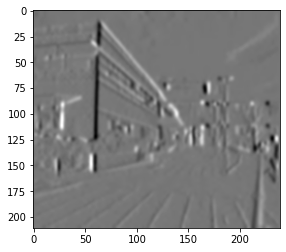

In [13]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.3,src2=sobely,beta=0.7,gamma=2)
plt.imshow(blended,cmap='gray')

# Challenge - Try Gradient Operations on a different image!

## Image Histograms

We know that MatPlotLib expects images in the RGB order (not BGR as used in OpenCV). So if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering. If we want to display the image it should be converted.

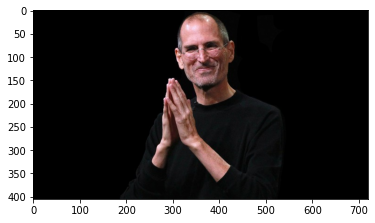

In [14]:
stevejobs = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/SteveJobs.jpg') #For processing
convertedsj = cv2.cvtColor(stevejobs, cv2.COLOR_BGR2RGB) #For output

plt.imshow(convertedsj)

Now we will first start by drawing a histogram of one colour. We will start with Blue (at Index 0 as we are working with BGR).

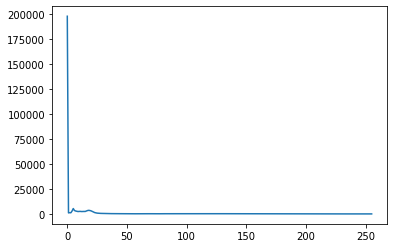

In [15]:
hist_values = cv2.calcHist([stevejobs],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

The majority of the image doesn't contain colour (as it is black) so as you may have expected, the only spikes we see in the line graph is towards the 0-20 which don't contain much colour (in a range of 0-255).

**Plotting 3 Colours**

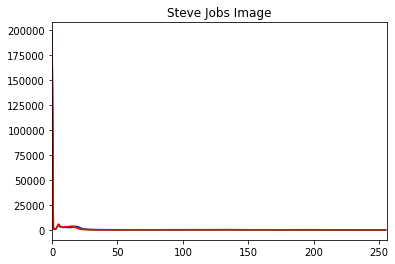

In [16]:
img = stevejobs
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Steve Jobs Image')
plt.show()

This is a large image that doesn't contain much colour (mostly black) so to be able to tell anything from the data we will need to change the xlim and ylim.

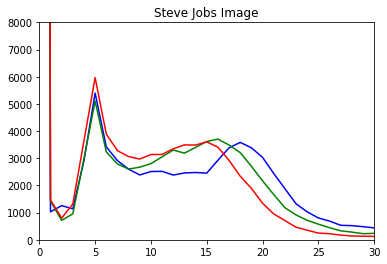

In [17]:
img = stevejobs
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,30]) #Changed the limit to show data for effectively.
    plt.ylim([0,8000]) #Changed the limit to show data for effectively.
plt.title('Steve Jobs Image')
plt.show()

Now compare this with the Rainbow image that has a lot of colour.

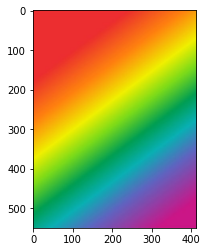

In [18]:
rainbow = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/rainbow.jpg') #For processing
convertedrainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB) #For output

plt.imshow(convertedrainbow)

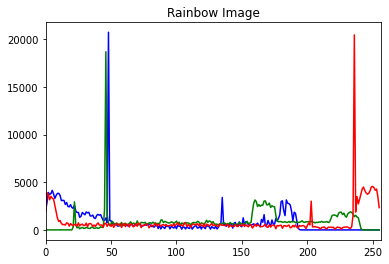

In [19]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

**Region of Interest (ROI)**

We have applied a ROI before when working with Blending, this can also help isolate a sectio of an image to perform analysis on.

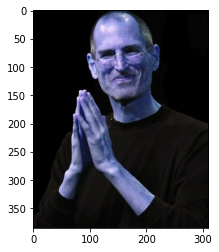

In [20]:
rows,cols,channels = stevejobs.shape
roi = stevejobs[5:390,210:520]
plt.imshow(roi)

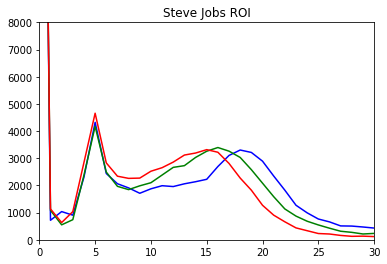

In [21]:
img = roi
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,30])
    plt.ylim([0,8000])
plt.title('Steve Jobs ROI')
plt.show()

# Challenge - Load in your own image and create a colour histogram for it!